<a href="https://colab.research.google.com/github/leocassiosilva/Analise-de-dados/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mlxtend.plotting import plot_decision_regions

In [84]:
class Perceptron:
  def __init__(self, eta=0.01, n_iter=10):
    self.eta =  eta
    self.n_iter = n_iter 
  
  def net_input(self, X):
    return np.dot(X, self.w_[1:] + self.w_[0])

  def predict (self, X):
      return np.where(self.net_input(X) >= 0.0, 1, -1)
    
  def fit(self, X, y):
    self.w_ = np.zeros(1 + X.shape[1])
    self.errors_= []

    for _ in range(self.n_iter):
      errors = 0
      for xi, target in zip(X,y):
        update = self.eta * (target - self.predict(xi))
        self.w_[1:] += update * xi
        self.w_[0] += update
        errors+= int(update != 0.0)
      self.errors_.append(errors)

In [85]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)

df.tail()

y = df.iloc[0:100, 4].values

y = np.where(y == 'Iris-setosa',-1,1)

X = df.iloc[0:100, [0,2]].values

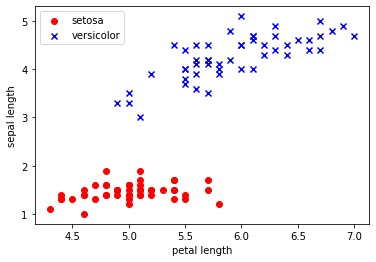

In [86]:
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

In [87]:
ppn = Perceptron(eta=0.01, n_iter=10)
ppn.fit(X, y)

In [73]:
# def plot_decision_regions(X, y, classifier, resolution=0.02):
#   markers = ('s', 'x','o','^','v')
#   colors = ('red', 'blue','lightgreen','gray','cyan')
#   cmap = ListedColormap(colors[:len(np.unique(y))])

#   x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
#   x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
  
#   xx1,xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
#   Z = classifier.predict(np.array[xx1.ravel(), xx2.ravel()].T)
#   Z  = Z.reshape(xx1.shape)
#   plt.contourf(xx1,xx2, Z, alpha=0.4, cmap=cmap)
#   for idx, cl in enumerate(np.unique(y)):
#     plt.scatter(x=X[y == cl, 0], y=X[y==cl,1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


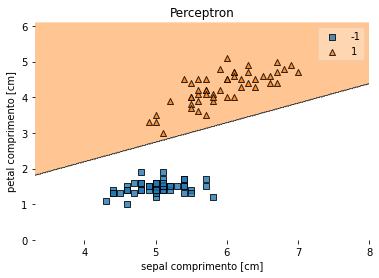

In [88]:
# # Classificação (Apenas para gráficos 2D)
plot_decision_regions(X, y, clf = ppn)
plt.title('Perceptron')
plt.xlabel('sepal comprimento [cm]')
plt.ylabel('petal comprimento [cm]')
plt.show()